In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
%matplotlib inline

**1 (a)**

In [2]:
sound1 = np.loadtxt('sound1.dat')
sound2 = np.loadtxt('sound2.dat')
p = 18000
freq = 8192
sound1.shape

(18000,)

**1(b)**

$\underline{x^{(\alpha)}} = \underline{A}  \underline{s^{(\alpha)}}$      $\alpha = 1,2,....p$

In [3]:
s = np.concatenate([[sound1, sound2]], axis=1)
A = np.linalg.inv(np.random.rand(2,2))
x = np.dot(A,s)
x.shape

(2, 18000)

**1(c)**

In [4]:
X = x.copy()
X = X[:,np.random.permutation(x.shape[1])]

**1(d)**

$\rho_{s_{i},x_{j}} = \frac{cov(s_{i},x_{j})}{\sigma_{s_{i}} \sigma_{x_{j}}}$

In [5]:
rho_00 = (np.cov(s[0, :], X[1, :]) / (np.std(s[0, :]) * np.std(X[1, :])))[0, 1]
rho_01 = (np.cov(s[0, :], X[1, :])/(np.std(s[0, :])*np.std(X[1, :])))[0, 1]
rho_10 = (np.cov(s[1, :], X[0, :])/(np.std(s[1, :])*np.std(X[0, :])))[0, 1]
rho_11 = (np.cov(s[1, :], X[1, :])/(np.std(s[1, :])*np.std(X[1, :])))[0, 1]
print("The correlation between source and center are: {}, {}, {}, {}".format(rho_00, rho_01, rho_10, rho_11))

The correlation between source and center are: -1.4269430509615228e-05, -1.4269430509615228e-05, 0.002271684682453629, -0.007635510690831208


**1(e)**

In [6]:
X -= X.mean(axis=1).reshape((2, 1))
x -= x.mean(axis=1).reshape((2, 1))

**1(f)**

In [7]:
W = np.random.rand(2, 2)

**2(a)**

In [8]:
def transfer_function(x):
    return 1 - 2 * (1 / (1 + np.exp(-x)))


def standard_gradient(W, w_inv, X, epsilon, frobenius, frob):
    for t, row in enumerate(X.T):
        epsilon = epsilon*0.99999
        W_new = W.copy()

        for (i, j), _ in np.ndenumerate(W):

            temp = 0
            for k, _ in enumerate(row):
                temp += W[i, k]*row[k]
                dw = (w_inv[j, i] + transfer_function(temp)*row[j])
                W_new[i, j] += epsilon*dw

            if (frob > 0) & (t % (frob-1) == 0):
                frobenius[t//frob] = ((W_new - W)**2).sum()

            W = W_new

    return W, frobenius

**2(b)**

In [9]:
def natural_gradient(W, X, epsilon, w_inv, frob, frobenius, iden):
    for t, x in enumerate(X.T):
        epsilon = 0.9999*epsilon  # adjust learning rate
        W_new = W.copy()  # make a copy of W

        # Loop through each (i,j) pair in W
        for (i, j), _ in np.ndenumerate(W):
            dedw = 0
            for l in range(W.shape[0]):
                y = 0
                yl = 0
                for k, _ in enumerate(x):
                    y += W[i, k]*x[k]
                    yl += W[l, k]*x[k]

                    # Calculate partial of error function with respect to w
                    dedw += (iden[i, l] + transfer_function(y)*yl)*W[l, j]

                # Update weights
                W_new[i, j] += epsilon*dedw

            # Calculate frobenius norm
            if (frob > 0) & (t % (frob-1) == 0):
                frobenius[t//frob] = ((W_new - W)**2).sum()

            # Update original weight matrix
            W = W_new
    return W, frobenius

**2(c)**

In [10]:
W_standard = W.copy()
W_natural = W.copy()

W_inv = np.linalg.inv(W_natural)
ep = 0.01
frobenius_standard = np.zeros((x.shape[1]//1000,))

W_standard, frobenius_standard = standard_gradient(
    W, W_inv, x, ep, frobenius_standard, 1000)


W_inv = np.linalg.inv(W_natural)
ep = 0.01
mat = np.identity(W_natural.shape[0])
frobenius_natural = np.zeros((x.shape[1]//1000,))

W_natural, frobenius_natural = natural_gradient(
    W, x, ep, W_inv, 1000, frobenius_natural, mat)

**3(a)**

In [11]:
t = np.arange(s.shape[1])/freq

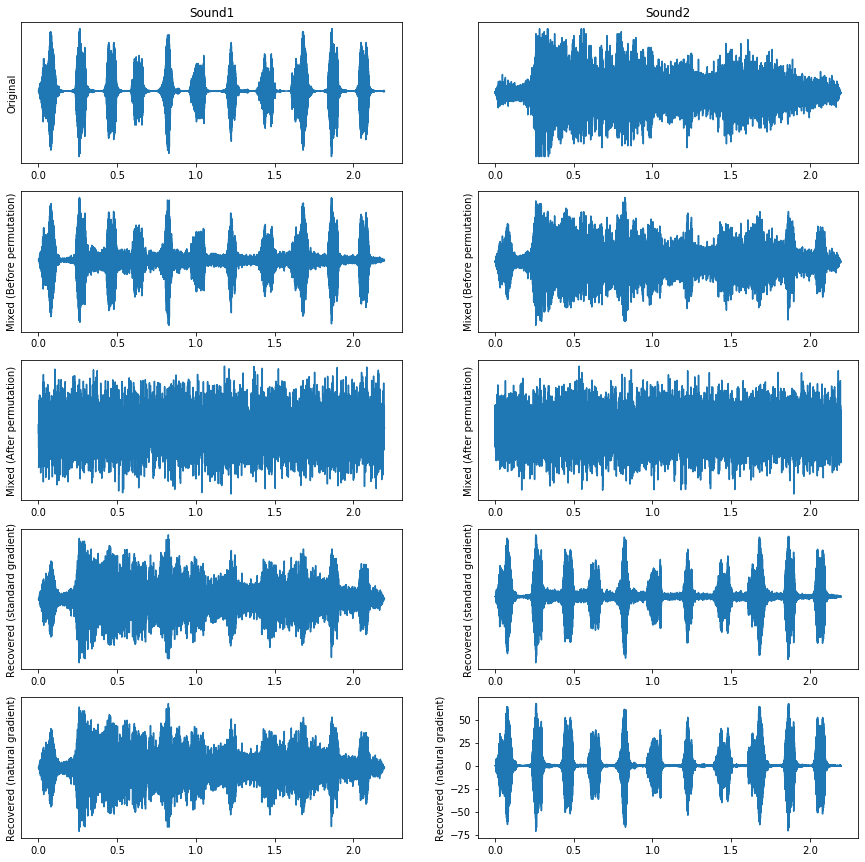

In [17]:
fig, axs = plt.subplots(5, 2, figsize=(15, 15))

plt.sca(axs[0, 0])
plt.title('Sound1')
plt.ylabel('Original')
plt.yticks([])
plt.plot(t, s[0])


plt.sca(axs[0, 1])
plt.title('Sound2')
plt.plot(t, s[1])
plt.yticks([])

plt.sca(axs[1, 0])
plt.plot(t, x[0])
plt.ylabel('Mixed (Before permutation)')
plt.yticks([])

plt.sca(axs[1, 1])
plt.plot(t, x[1])
plt.ylabel('Mixed (Before permutation)')
plt.yticks([])

plt.sca(axs[2, 0])
plt.plot(t, X[0])
plt.ylabel('Mixed (After permutation)')
plt.yticks([])

plt.sca(axs[2, 1])
plt.plot(t, X[1])
plt.ylabel('Mixed (After permutation)')
plt.yticks([])

s_standard = W_standard @ x

plt.sca(axs[3, 0])
plt.plot(t, s_standard[0])
plt.ylabel('Recovered (standard gradient)')
plt.yticks([])

plt.sca(axs[3, 1])
plt.plot(t, s_standard[1])
plt.ylabel('Recovered (standard gradient)')
plt.yticks([])

s_natural = W_natural @ x

plt.sca(axs[4, 0])
plt.plot(t, s_natural[0])
plt.ylabel('Recovered (natural gradient)')
plt.yticks([])

plt.sca(axs[4, 1])
plt.plot(t, s_natural[1])
plt.ylabel('Recovered (natural gradient)')
plt.show()


Saving the sounds

In [25]:
wavfile.write('original_01.wav', freq, s[0])
wavfile.write('s01_mixed.wav', freq, X[0])
wavfile.write('recovered_01.wav', freq, s_natural[0])
wavfile.write('original_02.wav', freq, s[1])
wavfile.write('s02_mixed.wav', freq, X[1])
wavfile.write('recovered_02.wav', freq, s_natural[1])

**3(b)**

In [26]:
s_natural.shape

(2, 18000)

In [27]:
rho_new_00 = (np.cov(s[0, :], s_natural[1, :]) / (np.std(s[0, :]) * np.std(s_natural[1, :])))[0, 1]
rho_new_01 = (np.cov(s[0, :], s_natural[1, :])/(np.std(s[0, :])*np.std(s_natural[1, :])))[0, 1]
rho_new_10 = (np.cov(s[1, :], s_natural[0, :])/(np.std(s[1, :])*np.std(s_natural[0, :])))[0, 1]
rho_new_11 = (np.cov(s[1, :], s_natural[1, :])/(np.std(s[1, :])*np.std(s_natural[1, :])))[0, 1]
print("The correlation between source and center are: {}, {}, {}, {}".format(rho_new_00, rho_new_01, rho_new_10, rho_new_11))

The correlation between source and center are: 0.9997744560099024, 0.9997744560099024, 0.8103854711632228, 0.02496995370941142


**3(c)**

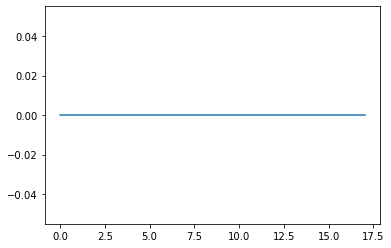

In [28]:
plt.plot(frobenius_standard)